In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score, rand_score
from chameleon import Chameleon

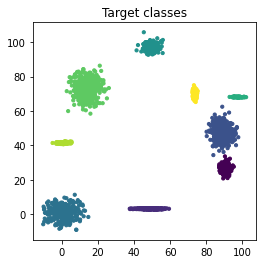

Wall time: 258 ms


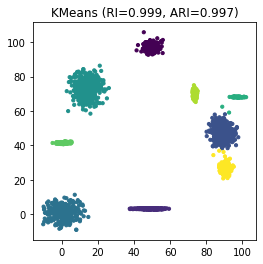

Wall time: 21 ms


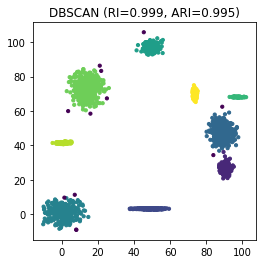

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/1326 [00:00<?, ?it/s]

  0%|          | 0/1275 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Wall time: 52.7 s


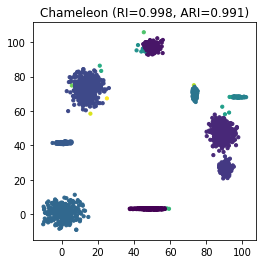

In [2]:
name = "2d-10c"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=3, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0.05, min_rc=0.05, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

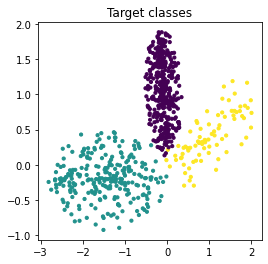

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Wall time: 245 ms


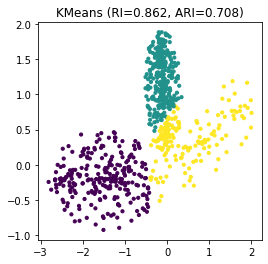

Wall time: 10 ms


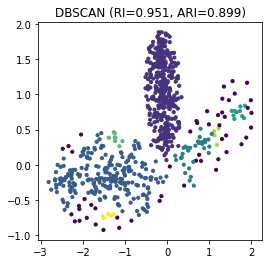

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Wall time: 2.67 s


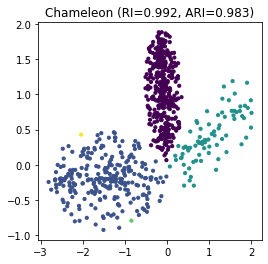

In [3]:
name = "2d-3c-no123"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.15, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0.1, min_rc=0.1, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

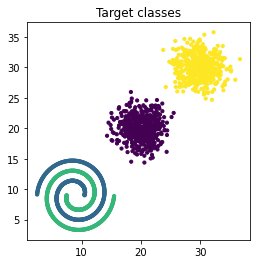

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Wall time: 246 ms


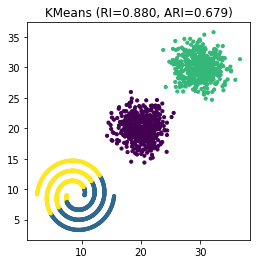

Wall time: 12 ms


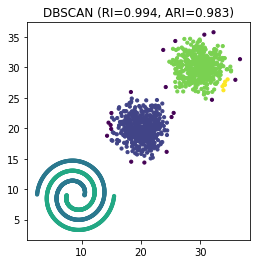

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Wall time: 14.7 s


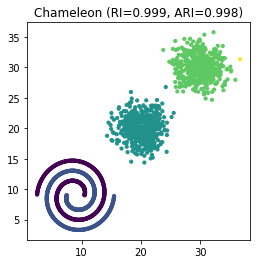

In [4]:
name = "2sp2glob"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=1, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0.1, min_rc=0.1, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

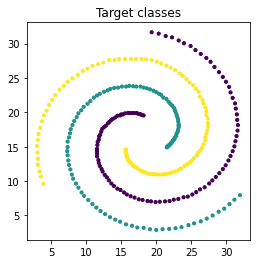

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Wall time: 238 ms


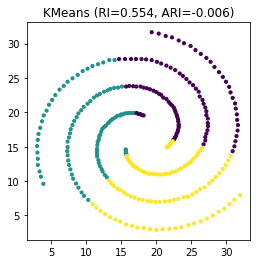

Wall time: 7 ms


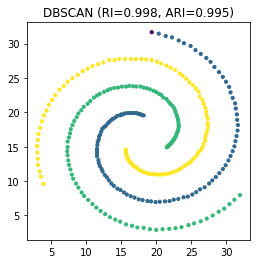

  0%|          | 0/3 [00:00<?, ?it/s]

Wall time: 224 ms


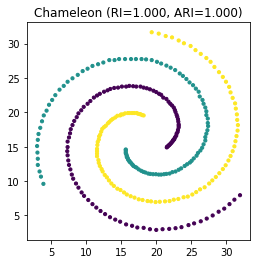

In [5]:
name = "3-spiral"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=2, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0.5, min_rc=0.5, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

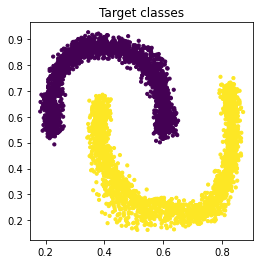

Wall time: 207 ms


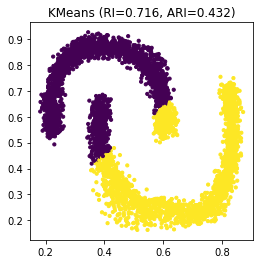

Wall time: 40 ms


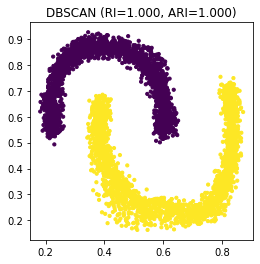

  0%|          | 0/1275 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

Wall time: 2min 45s


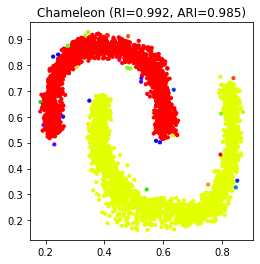

In [6]:
name = "banana"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.05, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.2, min_ri=0.01, min_rc=0.05, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

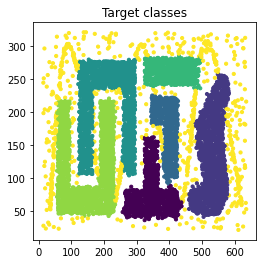

Wall time: 249 ms


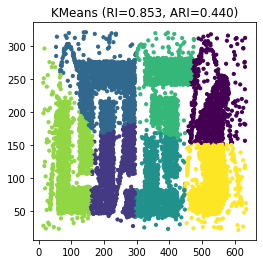

Wall time: 35 ms


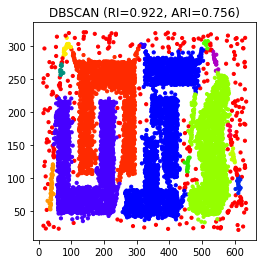

  0%|          | 0/9316 [00:00<?, ?it/s]

  0%|          | 0/9180 [00:00<?, ?it/s]

  0%|          | 0/9045 [00:00<?, ?it/s]

  0%|          | 0/8911 [00:00<?, ?it/s]

  0%|          | 0/8778 [00:00<?, ?it/s]

  0%|          | 0/8646 [00:00<?, ?it/s]

  0%|          | 0/8515 [00:00<?, ?it/s]

  0%|          | 0/8385 [00:00<?, ?it/s]

  0%|          | 0/8256 [00:00<?, ?it/s]

  0%|          | 0/8128 [00:00<?, ?it/s]

  0%|          | 0/8001 [00:00<?, ?it/s]

  0%|          | 0/7875 [00:00<?, ?it/s]

  0%|          | 0/7750 [00:00<?, ?it/s]

  0%|          | 0/7626 [00:00<?, ?it/s]

  0%|          | 0/7503 [00:00<?, ?it/s]

  0%|          | 0/7381 [00:00<?, ?it/s]

  0%|          | 0/7260 [00:00<?, ?it/s]

  0%|          | 0/7140 [00:00<?, ?it/s]

  0%|          | 0/7021 [00:00<?, ?it/s]

  0%|          | 0/6903 [00:00<?, ?it/s]

  0%|          | 0/6786 [00:00<?, ?it/s]

  0%|          | 0/6670 [00:00<?, ?it/s]

  0%|          | 0/6555 [00:00<?, ?it/s]

  0%|          | 0/6441 [00:00<?, ?it/s]

  0%|          | 0/6328 [00:00<?, ?it/s]

  0%|          | 0/6216 [00:00<?, ?it/s]

  0%|          | 0/6105 [00:00<?, ?it/s]

  0%|          | 0/5995 [00:00<?, ?it/s]

  0%|          | 0/5886 [00:00<?, ?it/s]

  0%|          | 0/5778 [00:00<?, ?it/s]

  0%|          | 0/5671 [00:00<?, ?it/s]

  0%|          | 0/5565 [00:00<?, ?it/s]

  0%|          | 0/5460 [00:00<?, ?it/s]

  0%|          | 0/5356 [00:00<?, ?it/s]

  0%|          | 0/5253 [00:00<?, ?it/s]

  0%|          | 0/5151 [00:00<?, ?it/s]

  0%|          | 0/5050 [00:00<?, ?it/s]

  0%|          | 0/4950 [00:00<?, ?it/s]

  0%|          | 0/4851 [00:00<?, ?it/s]

  0%|          | 0/4753 [00:00<?, ?it/s]

  0%|          | 0/4656 [00:00<?, ?it/s]

  0%|          | 0/4560 [00:00<?, ?it/s]

  0%|          | 0/4465 [00:00<?, ?it/s]

  0%|          | 0/4371 [00:00<?, ?it/s]

  0%|          | 0/4278 [00:00<?, ?it/s]

  0%|          | 0/4186 [00:00<?, ?it/s]

  0%|          | 0/4095 [00:00<?, ?it/s]

  0%|          | 0/4005 [00:00<?, ?it/s]

  0%|          | 0/3916 [00:00<?, ?it/s]

  0%|          | 0/3828 [00:00<?, ?it/s]

  0%|          | 0/3741 [00:00<?, ?it/s]

  0%|          | 0/3655 [00:00<?, ?it/s]

  0%|          | 0/3570 [00:00<?, ?it/s]

  0%|          | 0/3486 [00:00<?, ?it/s]

  0%|          | 0/3403 [00:00<?, ?it/s]

  0%|          | 0/3321 [00:00<?, ?it/s]

  0%|          | 0/3240 [00:00<?, ?it/s]

Wall time: 3min 6s


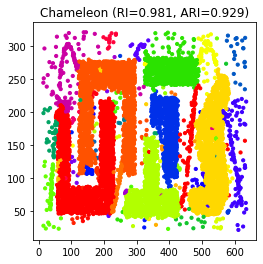

In [7]:
name = "cluto-t4-8k"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=10, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0.2, min_rc=0.2, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

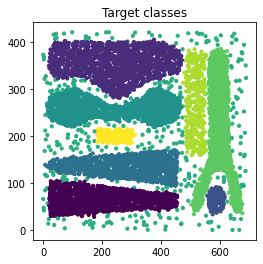

Wall time: 254 ms


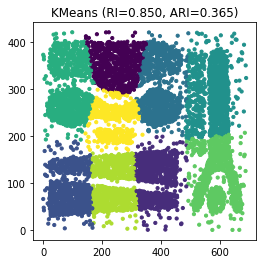

Wall time: 29 ms


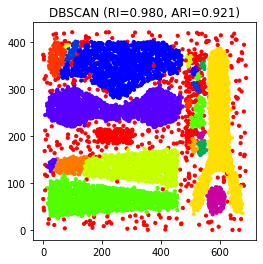

  0%|          | 0/6903 [00:00<?, ?it/s]

  0%|          | 0/6786 [00:00<?, ?it/s]

  0%|          | 0/6670 [00:00<?, ?it/s]

  0%|          | 0/6555 [00:00<?, ?it/s]

  0%|          | 0/6441 [00:00<?, ?it/s]

  0%|          | 0/6328 [00:00<?, ?it/s]

  0%|          | 0/6216 [00:00<?, ?it/s]

  0%|          | 0/6105 [00:00<?, ?it/s]

  0%|          | 0/5995 [00:00<?, ?it/s]

  0%|          | 0/5886 [00:00<?, ?it/s]

  0%|          | 0/5778 [00:00<?, ?it/s]

  0%|          | 0/5671 [00:00<?, ?it/s]

  0%|          | 0/5565 [00:00<?, ?it/s]

  0%|          | 0/5460 [00:00<?, ?it/s]

  0%|          | 0/5356 [00:00<?, ?it/s]

  0%|          | 0/5253 [00:00<?, ?it/s]

  0%|          | 0/5151 [00:00<?, ?it/s]

  0%|          | 0/5050 [00:00<?, ?it/s]

  0%|          | 0/4950 [00:00<?, ?it/s]

  0%|          | 0/4851 [00:00<?, ?it/s]

  0%|          | 0/4753 [00:00<?, ?it/s]

  0%|          | 0/4656 [00:00<?, ?it/s]

  0%|          | 0/4560 [00:00<?, ?it/s]

Wall time: 1min 13s


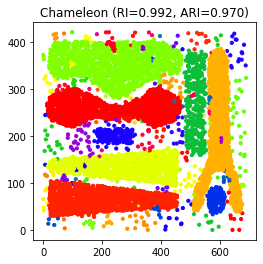

In [8]:
name = "cluto-t8-8k"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=10, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.25, min_ri=0.2, min_rc=0.2, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

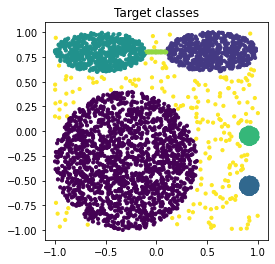

Wall time: 231 ms


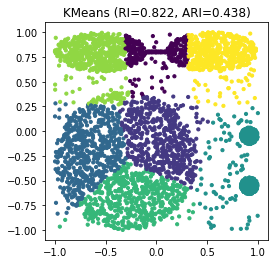

Wall time: 24.9 ms


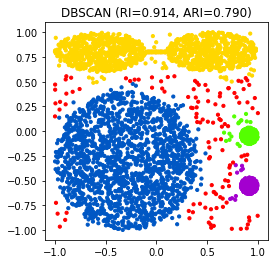

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

Wall time: 57.9 s


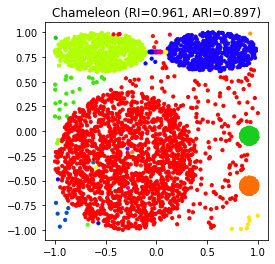

In [9]:
name = "cure-t2-4k"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.1, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0, min_rc=0, min_ri_rc=0.01).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

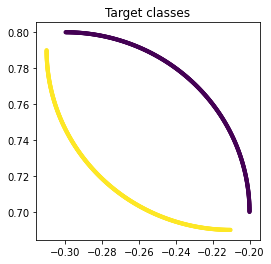

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Wall time: 226 ms


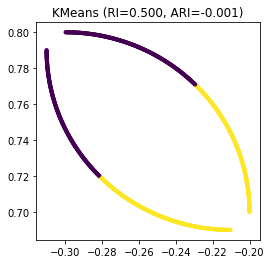

Wall time: 8 ms


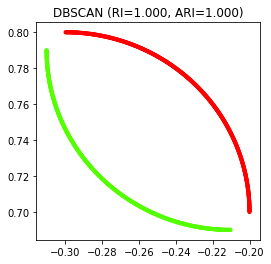

  0%|          | 0/1 [00:00<?, ?it/s]

Wall time: 511 ms


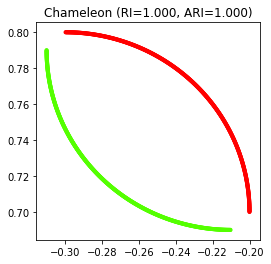

In [10]:
name = "curves2"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.01, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0, min_rc=0, min_ri_rc=0.2).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

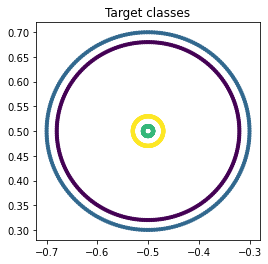

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Wall time: 234 ms


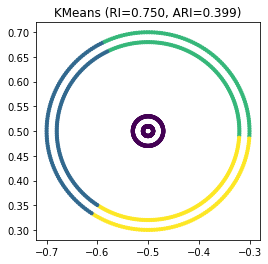

Wall time: 8 ms


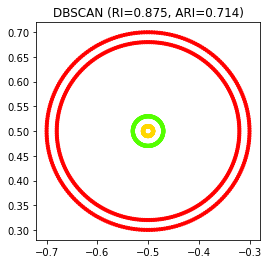

  0%|          | 0/6 [00:00<?, ?it/s]

Wall time: 486 ms


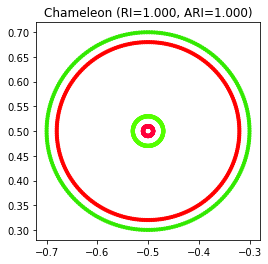

In [11]:
name = "dartboard2"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.01, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0, min_rc=0, min_ri_rc=0.2).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

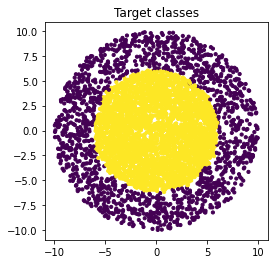

Wall time: 205 ms


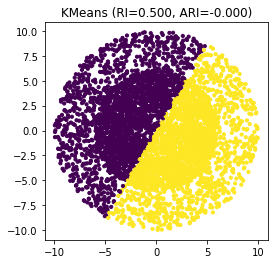

Wall time: 22 ms


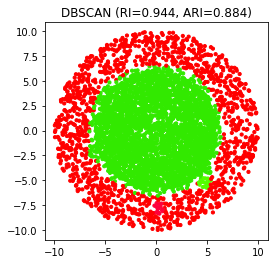

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Wall time: 9.43 s


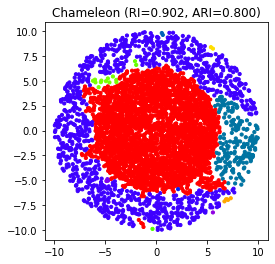

In [12]:
name = "dense-disk-5000"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.6, min_samples=20, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0.1, min_rc=0.1, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

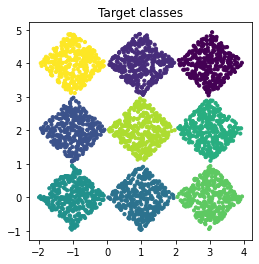

Wall time: 217 ms


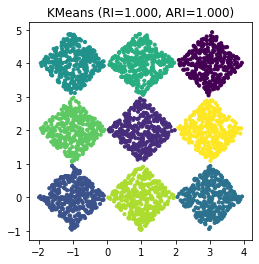

Wall time: 14 ms


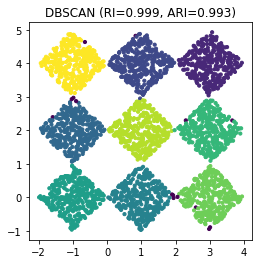

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/630 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

  0%|          | 0/561 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/406 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/253 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Wall time: 27.9 s


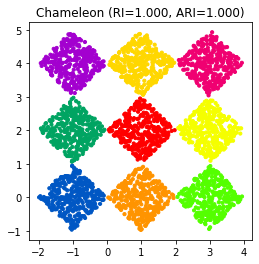

In [13]:
name = "diamond9"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.16, min_samples=9, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0.05, min_rc=0.05, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

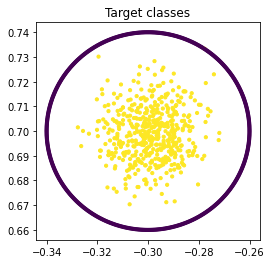

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Wall time: 247 ms


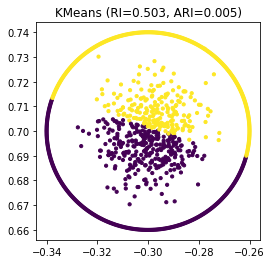

Wall time: 9 ms


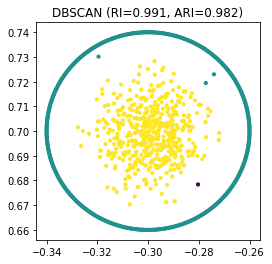

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Wall time: 2.75 s


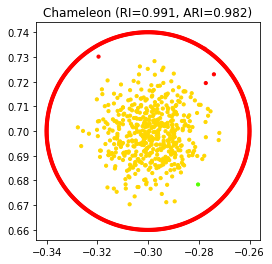

In [14]:
name = "donut2"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.006, min_samples=5, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0.05, min_rc=0.05, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

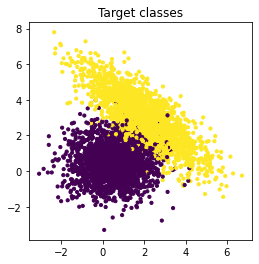

Wall time: 210 ms


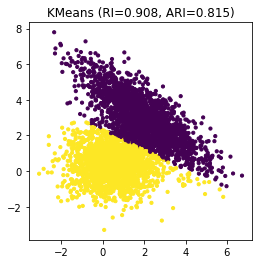

Wall time: 19 ms


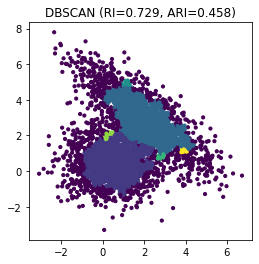

  0%|          | 0/3081 [00:00<?, ?it/s]

  0%|          | 0/3003 [00:00<?, ?it/s]

  0%|          | 0/2926 [00:00<?, ?it/s]

  0%|          | 0/2850 [00:00<?, ?it/s]

  0%|          | 0/2775 [00:00<?, ?it/s]

  0%|          | 0/2701 [00:00<?, ?it/s]

  0%|          | 0/2628 [00:00<?, ?it/s]

  0%|          | 0/2556 [00:00<?, ?it/s]

  0%|          | 0/2485 [00:00<?, ?it/s]

  0%|          | 0/2415 [00:00<?, ?it/s]

  0%|          | 0/2346 [00:00<?, ?it/s]

  0%|          | 0/2278 [00:00<?, ?it/s]

  0%|          | 0/2211 [00:00<?, ?it/s]

  0%|          | 0/2145 [00:00<?, ?it/s]

  0%|          | 0/2080 [00:00<?, ?it/s]

  0%|          | 0/2016 [00:00<?, ?it/s]

  0%|          | 0/1953 [00:00<?, ?it/s]

  0%|          | 0/1891 [00:00<?, ?it/s]

  0%|          | 0/1830 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1711 [00:00<?, ?it/s]

  0%|          | 0/1653 [00:00<?, ?it/s]

  0%|          | 0/1596 [00:00<?, ?it/s]

  0%|          | 0/1540 [00:00<?, ?it/s]

  0%|          | 0/1485 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/1326 [00:00<?, ?it/s]

  0%|          | 0/1275 [00:00<?, ?it/s]

  0%|          | 0/1225 [00:00<?, ?it/s]

  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1128 [00:00<?, ?it/s]

  0%|          | 0/1081 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/946 [00:00<?, ?it/s]

  0%|          | 0/903 [00:00<?, ?it/s]

  0%|          | 0/861 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/741 [00:00<?, ?it/s]

  0%|          | 0/703 [00:00<?, ?it/s]

Wall time: 32.9 s


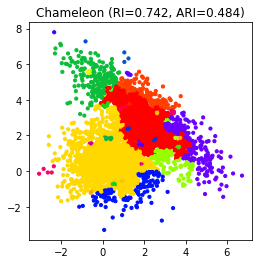

In [15]:
name = "engytime"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.2, min_samples=17, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=3, remove_edges_coef=0.2, min_ri=0.05, min_rc=0.1, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="prism")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

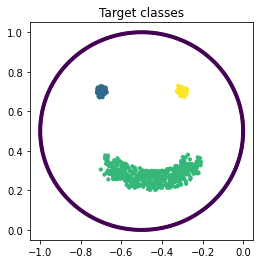

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Wall time: 232 ms


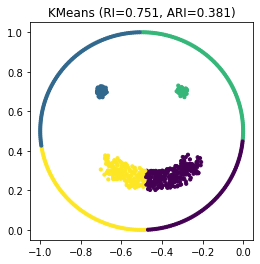

Wall time: 7.37 ms


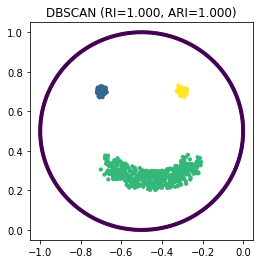

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Wall time: 3.48 s


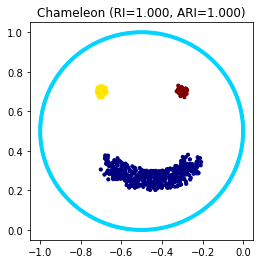

In [16]:
name = "smile2"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.1, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=5, remove_edges_coef=0.2, min_ri=0.01, min_rc=0.01, min_ri_rc=0).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10, cmap="jet")
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()

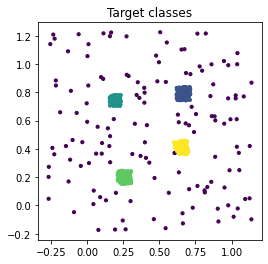

C:\Users\Adrian Brodzik\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Wall time: 233 ms


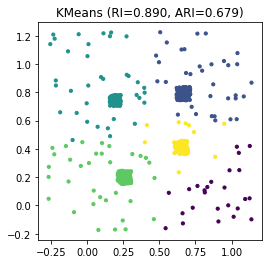

Wall time: 7.05 ms


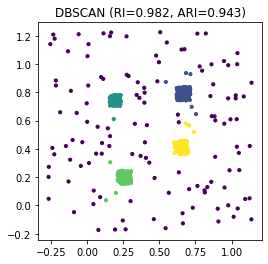

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Wall time: 990 ms


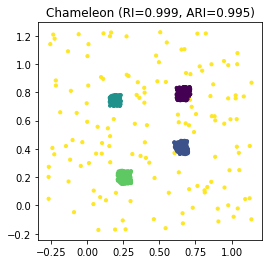

In [17]:
name = "zelnik4"

df = pd.read_csv(f"../data2/{name}.csv")

plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=df["target"], s=10)
plt.title("Target classes")
plt.savefig(f"{name}_target.png", dpi=100)
plt.show()

x = df[["x", "y"]].to_numpy()
y_true = df["target"].to_numpy()

%time y_pred = KMeans(n_clusters=df["target"].nunique(), random_state=42).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"KMeans (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_kmeans.png", dpi=100)
plt.show()

%time y_pred = DBSCAN(eps=0.1, min_samples=10, leaf_size=30, n_jobs=-1).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"DBSCAN (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_dbscan.png", dpi=100)
plt.show()

%time y_pred = Chameleon(k=10, remove_edges_coef=0.5, min_ri=0, min_rc=0, min_ri_rc=0.05).fit_predict(x)
ri = rand_score(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)
plt.figure(figsize=(4, 4))
plt.scatter(df["x"], df["y"], c=y_pred, s=10)
plt.title(f"Chameleon (RI={ri:.3f}, ARI={ari:.3f})")
plt.savefig(f"{name}_chameleon.png", dpi=100)
plt.show()